In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

points set([(11, 16), (7, 15), (1, 12), (1, 23), (4, 19), (5, 14), (21, 6), (21, 5), (13, 8), (19, 0), (24, 11)])
hull [(1, 12), (1, 23), (19, 0), (24, 11)]
colors [1000, 1000, 0, 0, 1000, 1000, 1000, 1000, 1000, 0, 0]


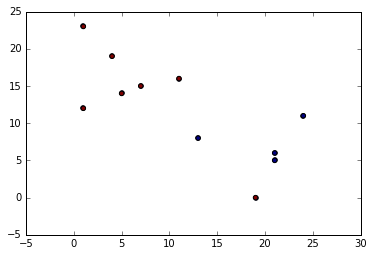

In [92]:
import matplotlib.path as mplPath
def in_shape(pt, shape):
    shape = shape + [shape[0]]f
    lines = shape #[[shape[x], shape[x+1]] for x in xrange(len(shape)-1)]
    shape = mplPath.Path(np.array(lines))
    return shape.contains_point(pt)

def complex_hull(points):
    hull = list(points.copy())
    for p1 in points:
        for p2 in points - {p1}:
            for p3 in points - {p1,p2}:
                for p4 in points - {p1,p2,p3}:
                    if p4 in hull and in_shape(p4, [p1,p2,p3]):
                            hull.remove(p4)
    return hull

num = 11
xs, ys = [np.random.randint(25) for x in xrange(num)],[np.random.randint(25) for x in xrange(num)]
plt.scatter(xs, ys)
points = set(zip(xs,ys))
hull = complex_hull(points)
xhull, yhull = zip(*hull)
colors = [0 if x in hull else 1000 for x in points]
print 'points', points
print 'hull', hull
print 'colors', colors
plt.scatter(xs, ys, c=colors)